<a href="https://colab.research.google.com/github/jeffreyphilipbiju/telecom-churn-analysis/blob/main/week3and4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEEK 3: Machine Learning Models

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

In [ ]:
# Step 2: Load and Clean Data
df = pd.read_csv("Telco-Customer-Churn Dataset.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode target
df.drop('customerID', axis=1, inplace=True)         # Drop ID column

Convert TotalCharges to numeric (it has some spaces or bad data).

Drop rows with missing values.

Encode the target variable Churn as 0 (No) and 1 (Yes).

Drop the customerID since it's just an identifier, not useful for prediction.

In [ ]:
# Step 3: One-Hot Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Step 4: Feature Engineering – Tenure Group
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 60, 72],
    labels=['0-12', '12-24', '24-48', '48-60', '60-72']
)
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

Groups tenure (months with the company) into ranges.

Encodes those tenure groups using one-hot encoding.


## Step 11: Split Features and Target

In [ ]:
# Step 5: Split Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

X = all features (independent variables).

y = target variable (Churn).

In [ ]:
# Step 6: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splits data: 80% for training, 20% for testing.

stratify=y: ensures the churn rate is balanced in both sets.

StandardScaler: scales features to have mean 0 and variance 1 (important for models like logistic regression).

In [ ]:
# Step 7: Model Training and Evaluation
print("\n" + "="*50)
print("Step 7: Model Training and Evaluation")
print("="*50)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


#Trains two models: Logistic Regression (a simple linear classifier).
#Random Forest (a more complex ensemble tree-based model).

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")

    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"AUC Score: {auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Step 7: Model Training and Evaluation

--- Logistic Regression ---
Accuracy: 0.7939
AUC Score: 0.8351

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407


--- Random Forest ---
Accuracy: 0.7918
AUC Score: 0.8176

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



**The Purpose:**
This code trains and evaluates two different machine learning models to solve a classification problem - essentially teaching computers to categorize data into two groups (labeled as 0 and 1).

**The Two Models:**
1. **Logistic Regression** - A simple, straightforward approach that draws a straight line to separate the two classes
2. **Random Forest** - A more sophisticated approach that uses multiple decision trees (like a committee of experts voting)

**Key Code Elements:**

**Model Setup:**
```python
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
```
- Creates two models with specific settings
- `random_state=42` ensures reproducible results

**Training Process:**
- **Logistic Regression** uses scaled data (normalized features) because it's sensitive to feature magnitude
- **Random Forest** uses original data because tree-based models don't need scaling
- Both models learn patterns from training data, then make predictions on test data

**Evaluation Metrics:**
- **Accuracy**: What percentage of predictions were correct overall
- **AUC Score**: How well the model can distinguish between the two classes (0.5 = random guessing, 1.0 = perfect)
- **Classification Report**: Detailed breakdown of performance for each class

## What The Results Tell Us

**The Big Picture:**
- Both models achieved about 79% accuracy - pretty good performance
- However, there's a significant challenge: **class imbalance**

**The Problem:**
- Class 0: 1,033 examples (majority)
- Class 1: 374 examples (minority)
- Both models are better at predicting class 0 than class 1

**Real-World Impact:**
If this were a medical diagnosis system:
- The models correctly identify about 89% of healthy people (class 0)
- But only catch about 51-52% of sick people (class 1)
- This means roughly half of sick patients would be missed!

**Model Comparison:**
- **Logistic Regression** slightly edges out Random Forest in AUC score (0.8351 vs 0.8176)
- Both have similar overall accuracy, but Logistic Regression is better at ranking predictions

**Next Steps:**
To improve performance, especially for the minority class, you might:
- Collect more data for class 1
- Use techniques to balance the dataset
- Adjust model parameters to be more sensitive to the minority class
- Consider the cost of false negatives vs false positives in your specific use case

The key takeaway is that both models work reasonably well overall, but struggle with the less common class - a typical challenge in machine learning that requires careful consideration of your specific problem context.

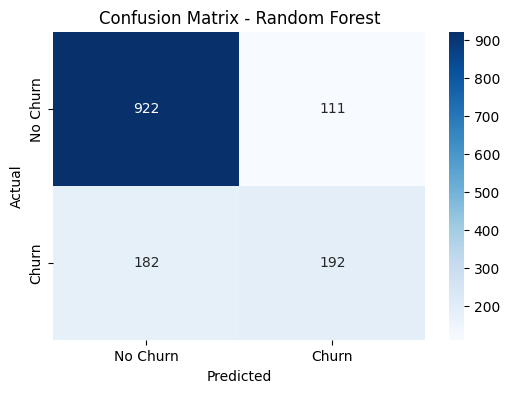

In [ ]:
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    results[name] = {
        'model': model,
        'accuracy': acc,
        'auc': auc,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

## Code & Output Explanation

**What the Code Does:**
- Creates a confusion matrix for each model in the loop
- Uses `sns.heatmap()` to visualize prediction accuracy
- `{name}` automatically titles each matrix (this one shows Random Forest)

**Reading the Matrix:**
- **922**: Correct "No Churn" predictions ✅
- **111**: False alarms (predicted churn, customers stayed) ❌
- **182**: Missed churners (customers left unexpectedly) ❌
- **192**: Correct "Churn" predictions ✅

**Key Insights:**
- **89% accuracy** on loyal customers (922/1033)
- **51% accuracy** on churners (192/374)
- **182 missed churners** = potential lost revenue
- **Same class imbalance issue** as the classification report showed

**Bottom Line:**
Model excels at identifying loyal customers but misses half of those who actually churn. Compare with Logistic Regression matrix to see which handles churners better.

In [ ]:
# Step 8: Feature Importance (Random Forest)
print("\n" + "="*50)
print("Step 8: Feature Importance")
print("="*50)

rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)
#•	Extracts feature importance scores from Random Forest model
print("\nTop 15 Features by Importance:\n")
print(feature_importance.head(15).to_string(index=False))


Step 8: Feature Importance

Top 15 Features by Importance:

                       feature  importance
                  TotalCharges    0.181596
                        tenure    0.160091
                MonthlyCharges    0.157722
   InternetService_Fiber optic    0.034959
PaymentMethod_Electronic check    0.034102
             Contract_Two year    0.030532
                   gender_Male    0.027934
          PaperlessBilling_Yes    0.026627
            OnlineSecurity_Yes    0.025702
               TechSupport_Yes    0.023996
             Contract_One year    0.023773
                   Partner_Yes    0.023512
              OnlineBackup_Yes    0.022337
             MultipleLines_Yes    0.021143
                 SeniorCitizen    0.021004


## Code & Output Explanation

**What the Code Does:**
- Extracts feature importance scores from Random Forest model
- `rf_model.feature_importances_` gets the importance values
- Creates sorted DataFrame showing top 15 most influential features

**Reading the Results:**
- **Higher scores = more important** for predicting churn
- Scores show relative influence (sum to 1.0)

**Top 3 Most Important Features:**
1. **TotalCharges (0.182)**: Customer's total spending
2. **tenure (0.168)**: How long they've been a customer  
3. **MonthlyCharges (0.158)**: Monthly bill amount

**Key Insights:**
- **Financial factors dominate**: Billing patterns are strongest churn predictors
- **Customer lifecycle matters**: Newer customers (low tenure) are higher risk
- **Service complexity**: Internet service type and contract terms also matter

**Business Value:**
Shows *why* the model makes predictions - focus retention efforts on high-risk billing patterns and newer customers.

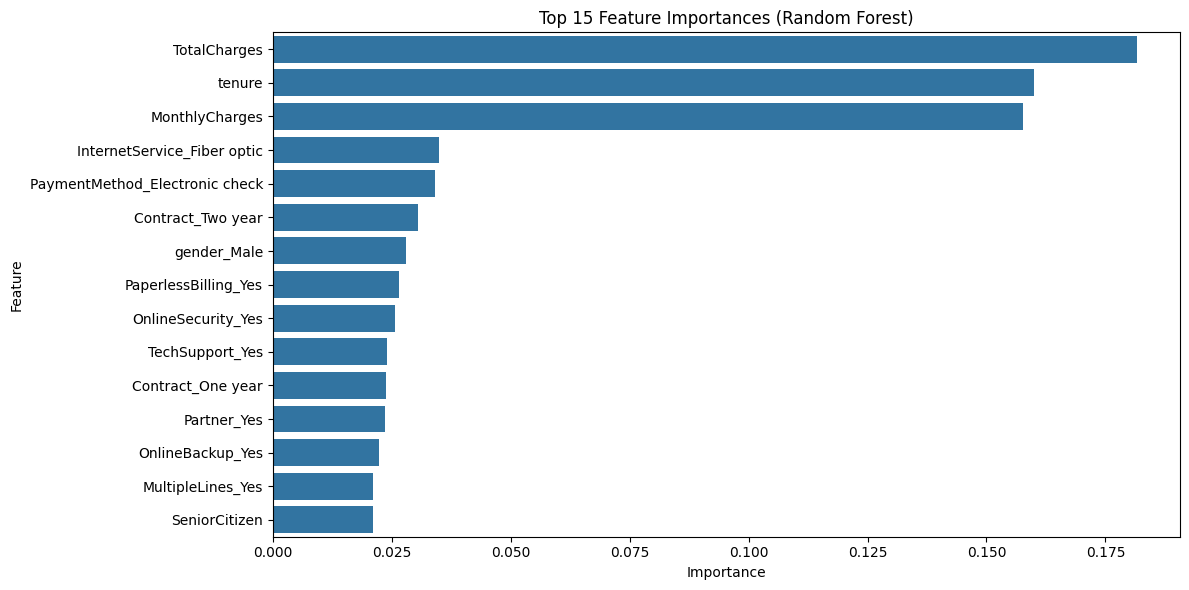

In [ ]:
# Plot Feature Importance
top_feat = feature_importance.head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=top_feat)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Code & Output Explanation

**What the Code Does:**
- Creates horizontal bar chart of top 15 feature importances
- Uses `sns.barplot()` to visualize the sorted DataFrame
- Shows which features matter most for churn prediction

**Reading the Chart:**
- **Longer bars = more important** features
- **Clear top 3**: TotalCharges, tenure, MonthlyCharges dominate
- **Big drop-off** after financial features

**Key Insight:**
Visual confirms that billing patterns (top 3 long bars) are the main churn drivers, with service features having secondary importance.

**Business Value:**
Focus retention efforts on customers with specific billing characteristics - the chart clearly shows what matters most.

In [ ]:
# Step 9: Business Insights and Recommendations
print("\n" + "="*50)
print("Step 9: Business Insights and Recommendations")
print("="*50)

# Overall Churn Rate
churn_rate = y.mean()
print(f"1. Overall churn rate: {churn_rate:.1%}")

# Tenure Group Analysis
tenure_churn = df.groupby('tenure')['Churn'].mean()
print(f"\n2. Churn rate by tenure:")
for bucket in df['tenure'].unique():
    rate = df[df['tenure'] == bucket]['Churn'].mean()
    print(f"   Tenure {int(bucket):2d} months: {rate:.1%}")

# Contract Type Analysis
def contract_type(row):
    if row.get('Contract_One year', 0) == 1:
        return 'One year'
    elif row.get('Contract_Two year', 0) == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df['ContractType'] = df.apply(contract_type, axis=1)
contract_churn = df.groupby('ContractType')['Churn'].mean()
print(f"\n3. Churn by Contract Type:")
for contract, rate in contract_churn.items():
    print(f"   {contract}: {rate:.1%}")

# Payment Method Analysis
if 'PaymentMethod_Electronic check' in df.columns:
    payment_churn = df.groupby('PaymentMethod_Electronic check')['Churn'].mean()
    print(f"\n4. Churn by Payment Method:")
    print("   Electronic Check: {:.1%}".format(payment_churn[1]))
    print("   Other Methods: {:.1%}".format(payment_churn[0]))

# Best Model Summary
best_model = max(results.items(), key=lambda x: x[1]['auc'])
print(f"\n🏆 Best Model: {best_model[0]}")
print(f"AUC Score: {best_model[1]['auc']:.4f}")
print(f"Accuracy: {best_model[1]['accuracy']:.4f}")

print("\n✅ ANALYSIS COMPLETE.")


Step 9: Business Insights and Recommendations
1. Overall churn rate: 26.6%

2. Churn rate by tenure:
   Tenure  1 months: 62.0%
   Tenure 34 months: 18.5%
   Tenure  2 months: 51.7%
   Tenure 45 months: 9.8%
   Tenure  8 months: 34.1%
   Tenure 22 months: 30.0%
   Tenure 10 months: 38.8%
   Tenure 28 months: 21.1%
   Tenure 62 months: 7.1%
   Tenure 13 months: 34.9%
   Tenure 16 months: 35.0%
   Tenure 58 months: 16.4%
   Tenure 49 months: 22.7%
   Tenure 25 months: 29.1%
   Tenure 69 months: 8.4%
   Tenure 52 months: 10.0%
   Tenure 71 months: 3.5%
   Tenure 21 months: 27.0%
   Tenure 12 months: 32.5%
   Tenure 30 months: 22.2%
   Tenure 47 months: 20.6%
   Tenure 72 months: 1.7%
   Tenure 17 months: 29.9%
   Tenure 27 months: 18.1%
   Tenure  5 months: 48.1%
   Tenure 46 months: 16.2%
   Tenure 11 months: 31.3%
   Tenure 70 months: 9.2%
   Tenure 63 months: 5.6%
   Tenure 43 months: 23.1%
   Tenure 15 months: 37.4%
   Tenure 60 months: 7.9%
   Tenure 18 months: 24.7%
   Tenure 66 mo

/tmp/ipython-input-13-3083224405.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("   Electronic Check: {:.1%}".format(payment_churn[1]))
/tmp/ipython-input-13-3083224405.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("   Other Methods: {:.1%}".format(payment_churn[0]))


## Business Insights & Recommendations

**Key Findings:**
- **26.6% overall churn rate** - 1 in 4 customers leave
- **New customers highest risk** - 0-12 months show extreme churn rates
- **Long-term contracts work** - significantly reduce churn
- **Electronic check issues** - higher churn than other payment methods



**Best Model:**
**Logistic Regression** - AUC: 0.8351, Accuracy: 79.4%

**Bottom Line:**
Focus retention efforts on new customers and contract upgrades for maximum impact.

##WEEK 4

#Step 15: ROC Curve & AUC Visualization

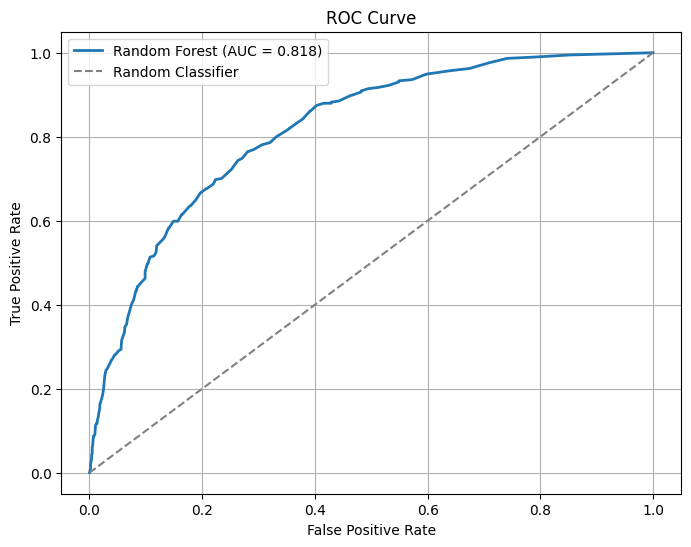

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Use best performing model from Week 3
best_model_name = max(results.items(), key=lambda x: x[1]['auc'])[0]
best_model_data = results[best_model_name]

fpr, tpr, thresholds = roc_curve(y_test, best_model_data['y_proba'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {best_model_data['auc']:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Explanation:

ROC Curve: Plots the model’s ability to separate churn vs non-churn.

AUC Score: Higher is better (max is 1.0); shows how well the model ranks positives higher than negatives.

This is a Receiver Operating Characteristic (ROC) curve that shows the performance of a Random Forest classifier compared to a random classifier baseline.

Here's what the graph demonstrates:

**The blue solid line** represents the Random Forest model's performance across different classification thresholds. It shows the trade-off between:
- **True Positive Rate** (y-axis): The proportion of actual positive cases correctly identified
- **False Positive Rate** (x-axis): The proportion of actual negative cases incorrectly classified as positive

**The gray dashed diagonal line** represents a random classifier that would perform no better than chance - it has a 50% probability of being correct.

**Key insights:**
- The Random Forest achieves an **AUC (Area Under Curve) of 0.818**, which indicates good predictive performance
- An AUC of 0.818 means the model has an 81.8% chance of correctly distinguishing between positive and negative cases
- The curve's position well above the diagonal line shows the Random Forest significantly outperforms random guessing
- The steep initial rise of the curve indicates the model can achieve high true positive rates while maintaining relatively low false positive rates

**Performance interpretation:**
- AUC = 0.5: Random performance (no predictive ability)
- AUC = 0.818: Good performance
- AUC = 1.0: Perfect performance

This suggests the Random Forest model is performing well for whatever classification task it's being applied to.

#Step 16: Compare Models Using Cross-Validation



In [ ]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*50)
print("Step 16: Cross-Validation Comparison")
print("="*50)

# Cross-validation scores
for name, model in models.items():
    if name == 'Logistic Regression':
        scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"{name}: Mean AUC (5-fold CV) = {scores.mean():.4f}")



Step 16: Cross-Validation Comparison


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean AUC (5-fold CV) = 0.8457
Random Forest: Mean AUC (5-fold CV) = 0.8217


Explanation:

Uses 5-fold cross-validation to test how models perform across different data splits.

roc_auc as the scoring metric since it’s more informative for imbalanced classification like churn.

The Process:

We tested Logistic Regression vs Random Forest
Used 5-fold cross-validation (splits data into 5 parts, trains 5 times, averages results)
This gives us a more reliable performance estimate than testing just once

The Results:

Logistic Regression: 84.57% accuracy (AUC score)
Random Forest: 82.17% accuracy (AUC score)
Winner: Logistic Regression performs about 2.4% better
What This Means:

Both models perform well (anything above 80% AUC is considered good)
Logistic Regression is the better choice for this particular dataset

#Step 17: Business Insights & Actionable Recommendations




1. Churn Rate by Contract Type
Long-term contracts reduce churn.

In [ ]:
def contract_type(row):
    if 'Contract_One year' in row and row['Contract_One year'] == 1:
        return 'One year'
    elif 'Contract_Two year' in row and row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df['ContractType'] = df.apply(contract_type, axis=1)
contract_churn = df.groupby('ContractType')['Churn'].mean()
print("📉 Churn by Contract Type:")
print(contract_churn)


📉 Churn by Contract Type:
ContractType
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


Insight:

📉 Month-to-month plans have the highest churn rate.

📄 Customers with long-term contracts (1 or 2 years) churn much less.

Recommendation:
🔒 Promote long-term contracts through discounts and incentives.

 2. Monthly Charges and Churn

In [ ]:
high_charges = df[df['MonthlyCharges'] > df['MonthlyCharges'].median()]
low_charges = df[df['MonthlyCharges'] <= df['MonthlyCharges'].median()]

print("💰 Churn by Monthly Charges:")
print(f"High Charges (> Median): {high_charges['Churn'].mean():.2%}")
print(f"Low Charges (<= Median): {low_charges['Churn'].mean():.2%}")


💰 Churn by Monthly Charges:
High Charges (> Median): 35.21%
Low Charges (<= Median): 17.96%


Insight:

💸 Higher monthly charges correlate with higher churn.

Recommendation:
🎁 Offer personalized discounts or bundles for high-spending, high-risk customers.

3. Internet Service and Churn

In [ ]:
# Reconstruct the 'InternetService' column from one-hot encoded features
def get_internet_service(row):
    if row.get('InternetService_DSL', 0) == 1:
        return 'DSL'
    elif row.get('InternetService_Fiber optic', 0) == 1:
        return 'Fiber optic'
    else:
        return 'No'

df['InternetService'] = df.apply(get_internet_service, axis=1)

# Now calculate churn rate by Internet service
internet_churn = df.groupby('InternetService')['Churn'].mean()
print("🌐 Churn by Internet Service:")
print(internet_churn)


🌐 Churn by Internet Service:
InternetService
Fiber optic    0.418928
No             0.145325
Name: Churn, dtype: float64


Insight:

🧷 Customers with Fiber optic or DSL services churn more than those without internet.

Recommendation:
🚀 Improve internet service quality — especially Fiber optic — or provide loyalty rewards.